In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import mysql.connector as mysql
import warnings
import contextlib


warnings.filterwarnings("ignore")

In [2]:
user = os.environ.get('USER')
password = os.environ.get('PASSWORD')
host = os.environ.get('HOST')
database = os.environ.get('DATABASE')

In [3]:
with open('../sql/analysis.sql', 'r') as f:
    query = f.read()

In [4]:
with mysql.connect(user=user, password=password, host=host, database=database) as conn:
    
    data = pd.read_sql(query, conn)

In [5]:
data.head()

,id_wycieczki,ilosc_uczestnikow,kwota,ilosc_dni,miasto,kraj,tematyka,data_rozpoczecia
0,778,11,39477.70,14,Madryt,Hiszpania,Wyścig na zegarach ściennych,2023-06-17
1,333,7,37861.32,18,Gdańsk,Polska,Zawody w liczeniu kropli deszczu,2018-08-17
2,1545,9,37208.10,15,Warszawa,Polska,Skakanie w workach na głowie,2021-04-23
3,1816,10,35368.29,13,Zagrzeb,Chorwacja,Parkur po cudzych balkonach,2016-08-05
4,360,7,32704.29,15,Zakopane,Polska,Wyścig na zegarach ściennych,2023-06-22


In [6]:
data['data_rozpoczecia'] = pd.to_datetime(data['data_rozpoczecia'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1887 entries, 0 to 1886
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id_wycieczki       1887 non-null   int64         
 1   ilosc_uczestnikow  1887 non-null   int64         
 2   kwota              1887 non-null   float64       
 3   ilosc_dni          1887 non-null   int64         
 4   miasto             1887 non-null   object        
 5   kraj               1887 non-null   object        
 6   tematyka           1887 non-null   object        
 7   data_rozpoczecia   1887 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 118.1+ KB


In [8]:
data['kwota_na_osobe_na_dzien'] = data['kwota'] / (data['ilosc_uczestnikow'] * data['ilosc_dni'])


In [9]:
sns.set_theme(style="darkgrid")

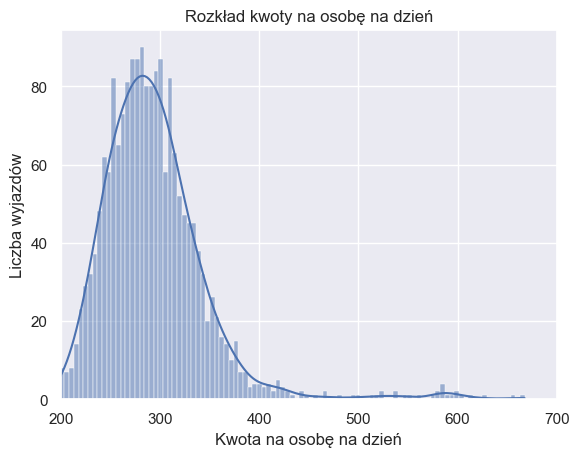

In [10]:
with contextlib.redirect_stdout(open(os.devnull, 'w')):
    ax = sns.histplot(data=data, x='kwota_na_osobe_na_dzien', kde=True, bins=100)
    plt.xlim(200, 700)
    ax.set(xlabel='Kwota na osobę na dzień', ylabel='Liczba wyjazdów')
    ax.set_title('Rozkład kwoty na osobę na dzień')


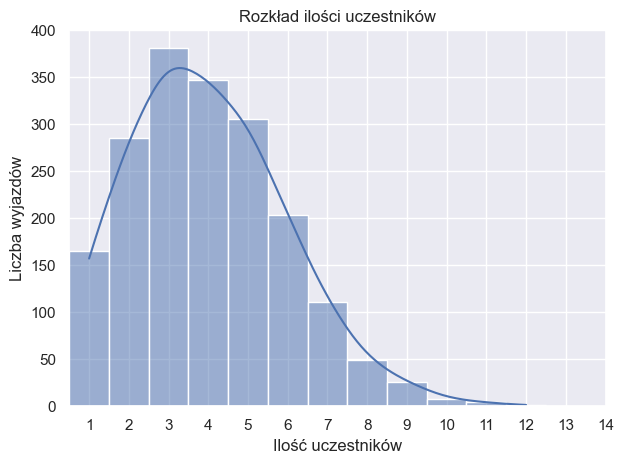

In [11]:
with contextlib.redirect_stdout(open(os.devnull, 'w')):
   ax = sns.histplot(data=data, x='ilosc_uczestnikow', kde=True, discrete=True, kde_kws={'bw_adjust': 1.5}, bins=len(data['ilosc_uczestnikow'].unique()))
   ax.set_xlim(0.5,14)
   plt.xticks(np.arange(1, 15, 1), labels=np.arange(1, 15, 1))
   ax.set(xlabel='Ilość uczestników', ylabel='Liczba wyjazdów')
   ax.set_title('Rozkład ilości uczestników')
   plt.tight_layout()  

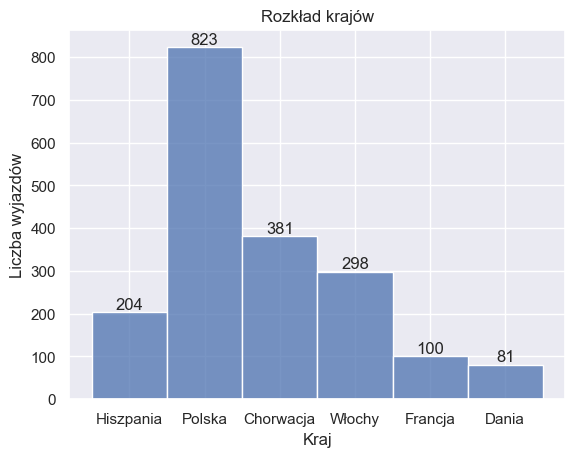

In [12]:
with contextlib.redirect_stdout(open(os.devnull, 'w')):
    ax = sns.histplot(x='kraj', data=data)
    ax.set(xlabel='Kraj', ylabel='Liczba wyjazdów')
    ax.bar_label(ax.containers[0])
    ax.set_title('Rozkład krajów')

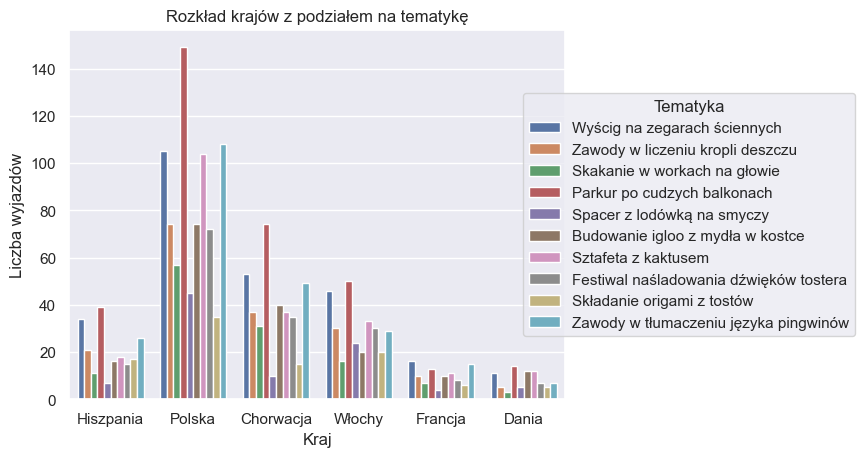

In [13]:

with contextlib.redirect_stdout(open(os.devnull, 'w')):
    ax = sns.countplot(x='kraj', data=data, hue='tematyka', palette='deep')


    ax.legend(title='Tematyka', loc='center right', bbox_to_anchor=(1.6, 0.5))
    ax.set(xlabel='Kraj', ylabel='Liczba wyjazdów')
    ax.set_title('Rozkład krajów z podziałem na tematykę')

In [14]:
months_dict = {1: 'Styczeń', 2: 'Luty', 3: 'Marzec', 4: 'Kwiecień', 5: 'Maj', 6: 'Czerwiec', 7: 'Lipiec', 8: 'Sierpień', 9: 'Wrzesień', 10: 'Październik', 11: 'Listopad', 12: 'Grudzień'}
data['miesiac_rozpoczecia'] = data['data_rozpoczecia'].dt.month
data['miesiac_rozpoczecia'] = data['miesiac_rozpoczecia'].map(months_dict)
data['rok_rozpoczecia'] = data['data_rozpoczecia'].dt.year
data.head()

,id_wycieczki,ilosc_uczestnikow,kwota,ilosc_dni,miasto,kraj,tematyka,data_rozpoczecia,kwota_na_osobe_na_dzien,miesiac_rozpoczecia,rok_rozpoczecia
0,778,11,39477.70,14,Madryt,Hiszpania,Wyścig na zegarach ściennych,2023-06-17,256.348701,Czerwiec,2023
1,333,7,37861.32,18,Gdańsk,Polska,Zawody w liczeniu kropli deszczu,2018-08-17,300.486667,Sierpień,2018
2,1545,9,37208.10,15,Warszawa,Polska,Skakanie w workach na głowie,2021-04-23,275.615556,Kwiecień,2021
3,1816,10,35368.29,13,Zagrzeb,Chorwacja,Parkur po cudzych balkonach,2016-08-05,272.063769,Sierpień,2016
4,360,7,32704.29,15,Zakopane,Polska,Wyścig na zegarach ściennych,2023-06-22,311.469429,Czerwiec,2023


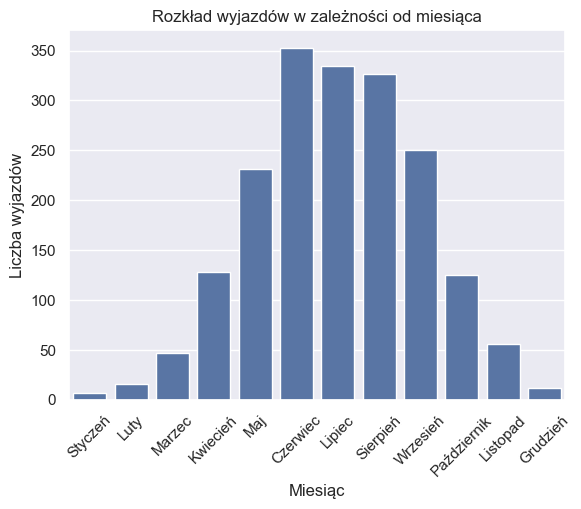

In [15]:
with contextlib.redirect_stdout(open(os.devnull, 'w')):

    ax = sns.countplot(data=data, x='miesiac_rozpoczecia', order=months_dict.values())
    ax.set(xlabel='Miesiąc', ylabel='Liczba wyjazdów')
    ax.set_title('Rozkład wyjazdów w zależności od miesiąca')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

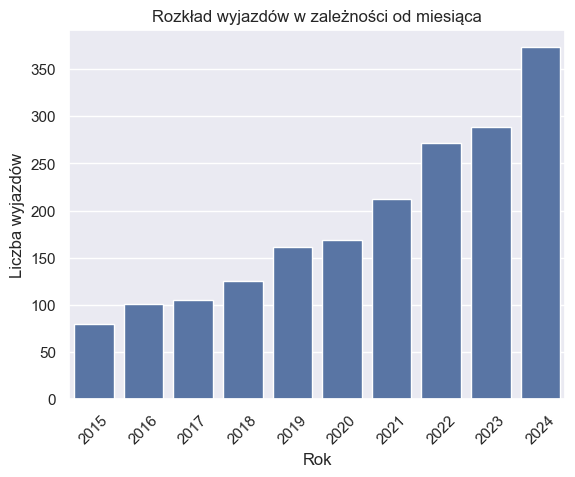

In [22]:
with contextlib.redirect_stdout(open(os.devnull, 'w')):

    ax = sns.countplot(data=data, x='rok_rozpoczecia')
    ax.set(xlabel='Rok', ylabel='Liczba wyjazdów')
    ax.set_title('Rozkład wyjazdów w zależności od miesiąca')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

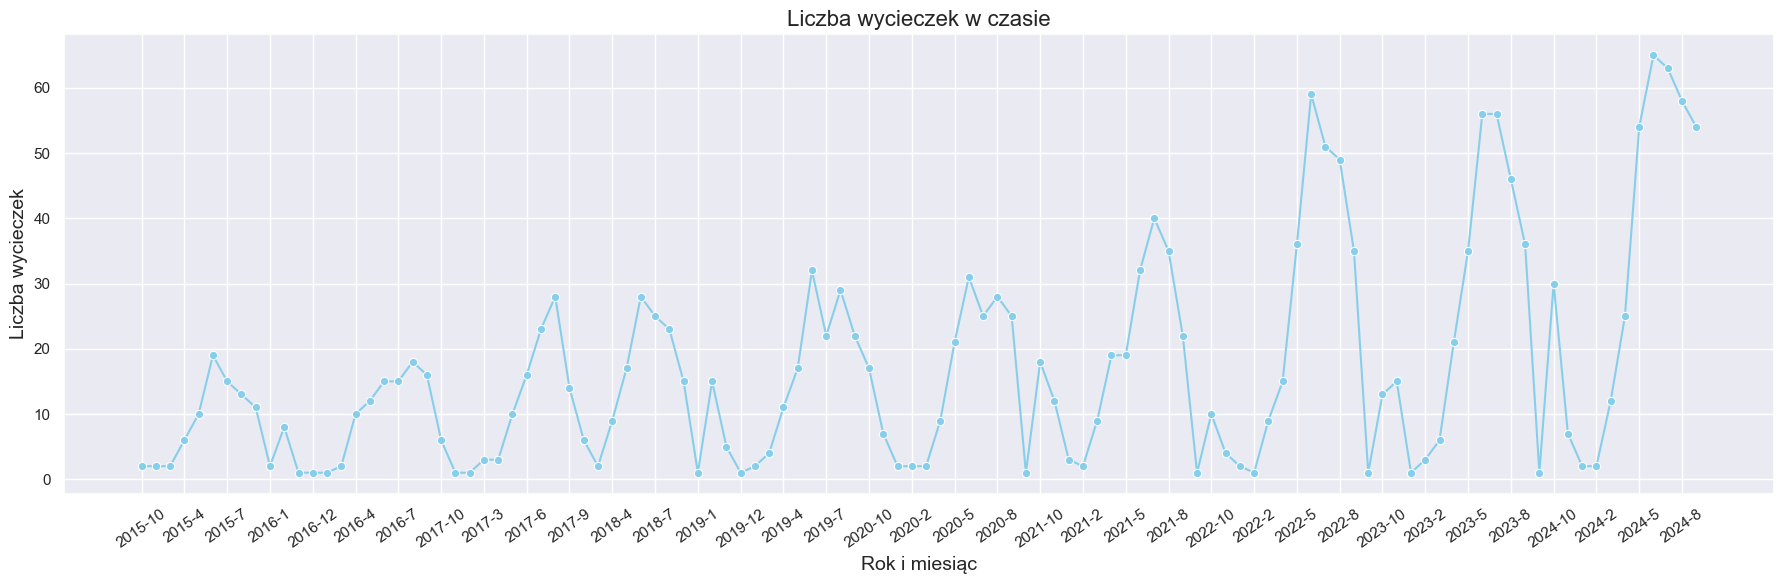

In [16]:
reversed_months_dict = {v: k for k, v in months_dict.items()}


plt.figure(figsize=(18, 6))
data["rok_i_miesiac"] = data["rok_rozpoczecia"].astype(str) + "-" + data["miesiac_rozpoczecia"].map(reversed_months_dict).astype(str)

monthly_trips = data.groupby("rok_i_miesiac").size().reset_index(name="ilosc_wyjazdow")

sns.lineplot(data=monthly_trips, x="rok_i_miesiac", y="ilosc_wyjazdow", marker="o", color="skyblue")

plt.title("Liczba wycieczek w czasie", fontsize=16)
plt.xlabel("Rok i miesiąc", fontsize=14)
plt.ylabel("Liczba wycieczek", fontsize=14)
plt.xticks(
    ticks=np.arange(0, len(monthly_trips), 3), 
    labels=monthly_trips["rok_i_miesiac"][::3], 
    rotation=35
)
plt.tight_layout()
plt.show()


In [17]:
with open('../sql/employee.sql', 'r') as f:
    employee_query = f.read()


with mysql.connect(user=user, password=password, host=host, database=database) as conn:
    
    employee_data = pd.read_sql(employee_query, conn)

In [18]:
employee_data.head()

,imie_i_nazwiako,data_zatrudnienia,stanowisko,wynagrodzenie
0,JulitaGilewicz,2021-06-26,Agent Biura Podróży,6420.0
1,AndrzejBurzawa,2024-07-05,Agent Biura Podróży,6100.0
2,SaraPleban,2022-09-12,Agent Biura Podróży,5830.0
3,LeonardDomoń,2023-04-11,Zastępca Kierownika,7270.0
4,AngelikaWyrobek,2021-06-13,Agent Biura Podróży,6070.0


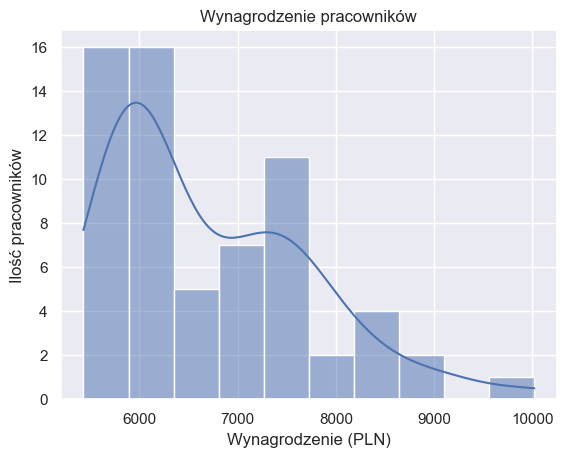

In [19]:
with contextlib.redirect_stdout(open(os.devnull, 'w')):

    ax = sns.histplot(data=employee_data, x='wynagrodzenie', kde=True, bins=10)
    ax.set(xlabel='Wynagrodzenie (PLN)', ylabel='Ilość pracowników')
    ax.set_title('Wynagrodzenie pracowników')

In [20]:
for u in employee_data['stanowisko'].unique():
    print(u)
    print(employee_data[employee_data['stanowisko'] == u]['wynagrodzenie'].describe())

Agent Biura Podróży
count      35.000000
mean     5939.714286
std       216.584255
min      5430.000000
25%      5825.000000
50%      5890.000000
75%      6065.000000
max      6420.000000
Name: wynagrodzenie, dtype: float64
Zastępca Kierownika
count      11.000000
mean     7512.727273
std       196.014842
min      7110.000000
25%      7425.000000
50%      7550.000000
75%      7625.000000
max      7790.000000
Name: wynagrodzenie, dtype: float64
Przewodnik
count      10.000000
mean     7028.000000
std       246.116504
min      6570.000000
25%      6917.500000
50%      7060.000000
75%      7130.000000
max      7390.000000
Name: wynagrodzenie, dtype: float64
Kierownik
count       4.000000
mean     8290.000000
std       160.208198
min      8200.000000
25%      8207.500000
50%      8215.000000
75%      8297.500000
max      8530.000000
Name: wynagrodzenie, dtype: float64
Prezes
count        1.0
mean     10020.0
std          NaN
min      10020.0
25%      10020.0
50%      10020.0
75%      10020